In [3]:
import zipfile
import os
zip_file_path = "archive (2).zip"
extract_folder = "cristiano_ronaldo_goals"
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)
extracted_files = os.listdir(extract_folder)
extracted_files

['data.csv']

In [5]:
import pandas as pd
file_path = os.path.join(extract_folder, "data.csv")
df = pd.read_csv(file_path)
df.head()

,Season,Competition,Matchday,Date,Venue,Club,Opponent,Result,Playing_Position,Minute,At_score,Type,Goal_assist
0,02/03,Liga Portugal,6,10-07-02,H,Sporting CP,Moreirense FC,3:00,LW,34,2:00,Solo run,NaN
1,02/03,Liga Portugal,6,10-07-02,H,Sporting CP,Moreirense FC,3:00,LW,90+5,3:00,Header,Rui Jorge
2,02/03,Liga Portugal,8,10/26/02,A,Sporting CP,Boavista FC,1:02,NaN,88,1:02,Right-footed shot,Carlos Martins
3,02/03,Taca de Portugal Placard,Fourth Round,11/24/02,H,Sporting CP,CD Estarreja,4:01,NaN,67,3:00,Left-footed shot,Cesar Prates
4,02/03,Taca de Portugal Placard,Fifth Round,12/18/02,H,Sporting CP,FC Oliveira do Hospital,8:01,NaN,13,3:00,NaN,NaN


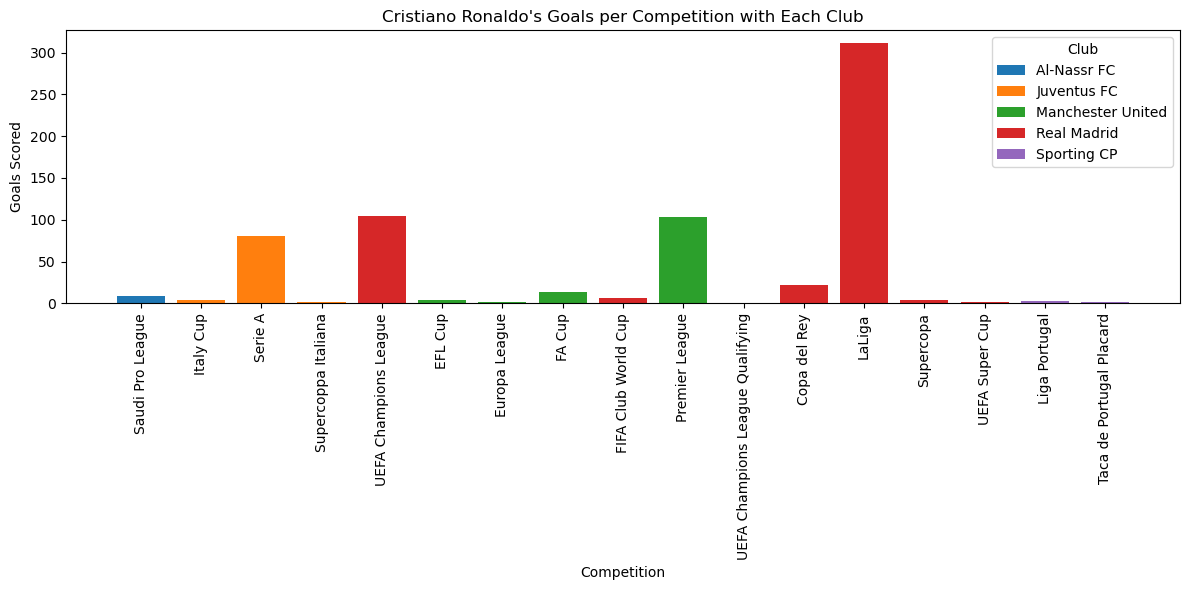

In [9]:
import matplotlib.pyplot as plt
goals_per_competition = df.groupby(["Club", "Competition"]).size().reset_index(name="Goals")
plt.figure(figsize=(12, 6))
for club in goals_per_competition["Club"].unique():
    subset = goals_per_competition[goals_per_competition["Club"] == club]
    plt.bar(subset["Competition"], subset["Goals"], label=club)

plt.xticks(rotation=90)
plt.xlabel("Competition")
plt.ylabel("Goals Scored")
plt.title("Cristiano Ronaldo's Goals per Competition with Each Club")
plt.legend(title="Club")
plt.tight_layout()

figure_path = "ronaldo_goals_per_competition.png"
plt.savefig(figure_path)

plt.show()

In [1]:
pip install mplsoccer 

   ---------------------------------------- 0.0/85.8 kB ? eta -:--:--
   ---- ----------------------------------- 10.2/85.8 kB ? eta -:--:--
   --------- ------------------------------ 20.5/85.8 kB 217.9 kB/s eta 0:00:01
   ------------------- -------------------- 41.0/85.8 kB 326.8 kB/s eta 0:00:01
   ------------------- -------------------- 41.0/85.8 kB 326.8 kB/s eta 0:00:01
   -------------------------------------- - 81.9/85.8 kB 416.7 kB/s eta 0:00:01
   ---------------------------------------- 85.8/85.8 kB 404.0 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


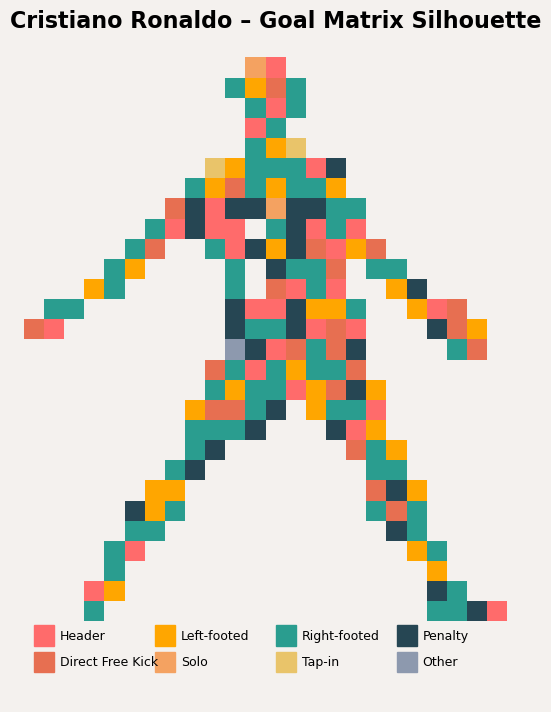

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

# 1. Load Dataset

df = pd.read_csv("data.csv")
goal_df = df.dropna(subset=['Type']).copy()

cols = 25
num_goals = len(goal_df)
rows = int(np.ceil(num_goals / cols))

color_map = {
    'Header': '#ff6b6b',
    'Left-footed': '#ffa600',
    'Right-footed': '#2a9d8f',
    'Penalty': '#264653',
    'Direct Free Kick': '#e76f51',
    'Solo': '#f4a261',
    'Tap-in': '#e9c46a',
    'Other': '#8d99ae'
}

goal_colors = []
for t in goal_df['Type'].fillna('').str.lower():
    if 'header' in t:
        goal_colors.append(color_map['Header'])
    elif 'left-footed' in t:
        goal_colors.append(color_map['Left-footed'])
    elif 'right-footed' in t:
        goal_colors.append(color_map['Right-footed'])
    elif 'penalty' in t:
        goal_colors.append(color_map['Penalty'])
    elif 'free kick' in t:
        goal_colors.append(color_map['Direct Free Kick'])
    elif 'solo' in t:
        goal_colors.append(color_map['Solo'])
    elif 'tap' in t:
        goal_colors.append(color_map['Tap-in'])
    else:
        goal_colors.append(color_map['Other'])


#  Load & Process Silhouette Image

image_path = "ronaldo_silhouette.webp"

img = Image.open(image_path).convert("L")  # grayscale
img_resized = img.resize((cols, rows), Image.Resampling.LANCZOS)
threshold = 128
binary_mask = np.array(img_resized) < threshold  # black = True


# Build Matrix

mask_indices = np.argwhere(binary_mask)
num_pixels = min(len(goal_colors), len(mask_indices))
selected_pixels = mask_indices[:num_pixels]

# Plot

fig, ax = plt.subplots(figsize=(6, 9))
fig.patch.set_facecolor('#f4f1ee')
ax.set_facecolor('#f4f1ee')
ax.set_xlim(0, cols)
ax.set_ylim(-4, rows)
ax.set_aspect('equal')
ax.axis('off')

# Draw matrix
for idx in range(num_pixels):
    y, x = selected_pixels[idx]
    color = goal_colors[idx]
    rect = patches.Rectangle((x, rows - y - 1), 1, 1, color=color, linewidth=0)
    ax.add_patch(rect)


# Legend & Title

legend_items = list(color_map.items())
legend_start_x = 0.5
legend_y_top = -1.2
legend_y_bottom = -2.5
gap_x = 6

for idx, (label, color) in enumerate(legend_items):
    row = idx // 4
    col = idx % 4
    lx = legend_start_x + col * gap_x
    ly = legend_y_top if row == 0 else legend_y_bottom
    ax.add_patch(patches.Rectangle((lx, ly), 1, 1, color=color))
    ax.text(lx + 1.3, ly + 0.5, label, va='center', fontsize=9, color='black')

# Title
ax.text(cols / 2, rows + 1.5, "Cristiano Ronaldo – Goal Matrix Silhouette", ha='center',
        fontsize=16, fontweight='bold', color='black')

plt.tight_layout()
plt.show()


In [51]:
!pip install folium

   ---------------------------------------- 0.0/110.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/110.9 kB ? eta -:--:--
   --- ------------------------------------ 10.2/110.9 kB ? eta -:--:--
   ---------- ---------------------------- 30.7/110.9 kB 435.7 kB/s eta 0:00:01
   ----------------------------------- -- 102.4/110.9 kB 737.3 kB/s eta 0:00:01
   -------------------------------------- 110.9/110.9 kB 805.2 kB/s eta 0:00:00


In [68]:
club_to_city = {
    'Sporting CP': 'Lisbon, Portugal',
    'Manchester United': 'Manchester, UK',
    'Real Madrid': 'Madrid, Spain',
    'Juventus FC': 'Turin, Italy',
    'Al-Nassr FC': 'Riyadh, Saudi Arabia'
}

city_coords = {
    'Lisbon, Portugal': (38.7169, -9.1399),
    'Manchester, UK': (53.4808, -2.2426),
    'Madrid, Spain': (40.4168, -3.7038),
    'Turin, Italy': (45.0703, 7.6869),
    'Riyadh, Saudi Arabia': (24.7136, 46.6753)
}

# color mapping with full clubs
clubs = list(club_counts.keys())
color_palette = list(mcolors.TABLEAU_COLORS.values()) + list(mcolors.CSS4_COLORS.values())
random.seed(42)
random.shuffle(color_palette)
club_colors = {club: color_palette[i % len(color_palette)] for i, club in enumerate(clubs)}

# Create the map
goal_map = folium.Map(location=[45, 10], zoom_start=3, tiles='CartoDB dark_matter')

# Add all markers
for club, count in club_counts.items():
    city = club_to_city.get(club)
    if city and city in city_coords:
        lat, lon = city_coords[city]
        folium.CircleMarker(
            location=[lat, lon],
            radius=5 + count / 10,
            color=club_colors[club],
            fill=True,
            fill_color=club_colors[club],
            fill_opacity=0.9,
            popup=folium.Popup(f"<b>{club}</b>: {count} goals", max_width=300)
        ).add_to(goal_map)

legend_html = """
<div style='position: fixed; 
            bottom: 50px; left: 50px; width: 250px; height: auto; 
            background-color: rgba(0, 0, 0, 0.7); 
            color: white; z-index:9999; font-size:14px; 
            border-radius: 8px; padding: 10px;'>
<b>Legend – Goals by Club</b><br>
"""
for club, color in club_colors.items():
    count = club_counts[club]
    legend_html += f"<div style='margin:4px 0;'><span style='background:{color};padding:5px 10px;border-radius:5px;display:inline-block;margin-right:10px;'></span>{club}: {count}</div>"

legend_html += "</div>"
goal_map.get_root().html.add_child(folium.Element(legend_html))

goal_map


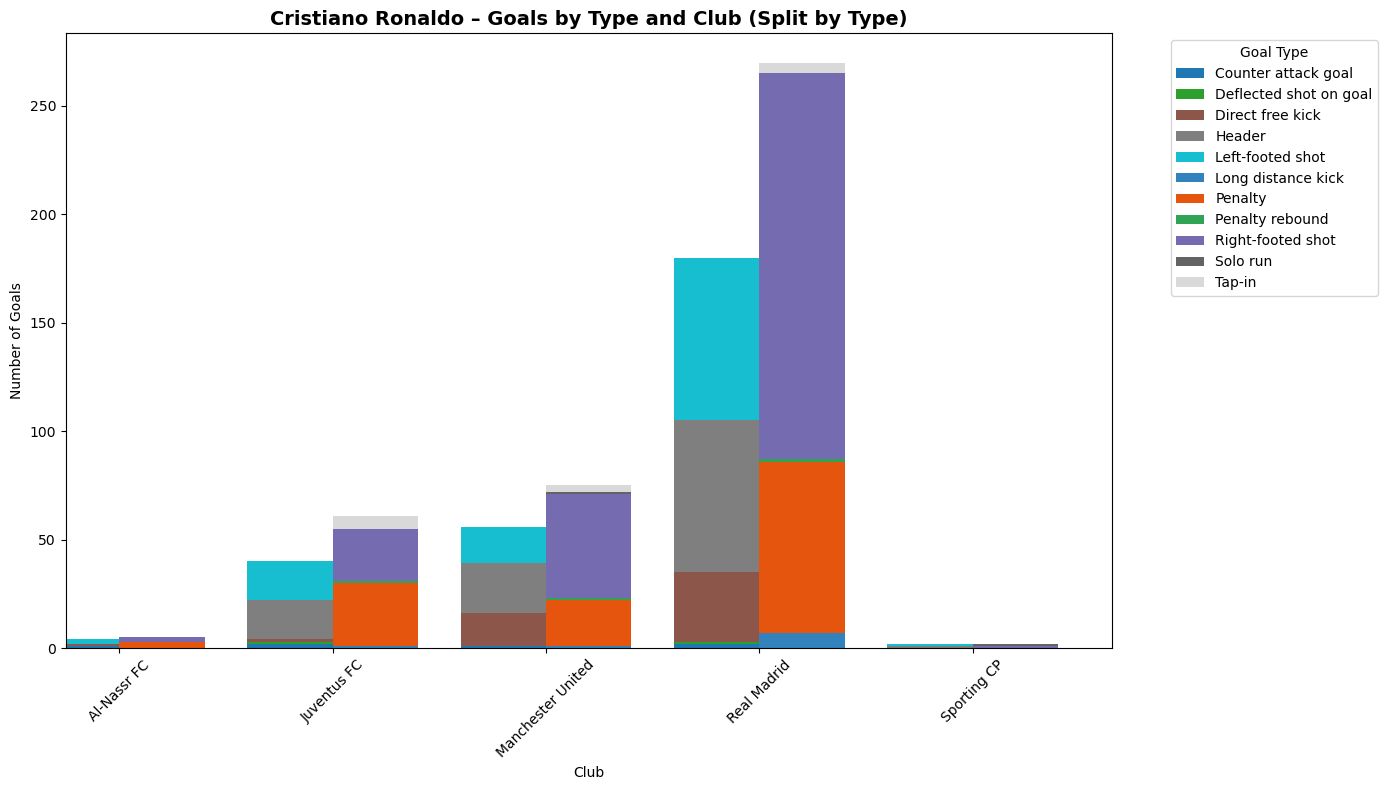

In [72]:
# oals by club and goal type
club_type_counts = df.groupby(['Club', 'Type']).size().unstack(fill_value=0)

# Define ordered goal types 
goal_types = list(club_type_counts.columns)
half = len(goal_types) // 2
left_types = goal_types[:half]
right_types = goal_types[half:]

# Set up side-by-side stacked bars
fig, ax = plt.subplots(figsize=(14, 8))
club_type_counts[left_types].plot(kind='bar', stacked=True, ax=ax, colormap='tab10', position=1, width=0.4)
club_type_counts[right_types].plot(kind='bar', stacked=True, ax=ax, colormap='tab20c', position=0, width=0.4)

# Titles and labels
ax.set_title("Cristiano Ronaldo – Goals by Type and Club (Split by Type)", fontsize=14, fontweight='bold')
ax.set_xlabel("Club")
ax.set_ylabel("Number of Goals")
ax.legend(title="Goal Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
